In [1]:
import math
import matplotlib.pylab as plt 
import matplotlib.axes
import numpy as np 
from matplotlib.animation import FuncAnimation

In [2]:
h = 22
l = 3
l_0 = 1.9
c = 2.3
side = 1

In [3]:
def count_angle(l, l_0, c, sum_angle, h_delta):    
    fi = c*math.sqrt(l_0*h_delta)/(l-l_0)
    #sin_fi = math.sin(fi)
    
    return fi 

timestep 0
0.0
timestep 0
0.0
timestep 1
2.882119284527955
timestep 2
6.958051465084431
timestep 3
11.950028499360911
timestep 4
17.71426706841682
timestep 5
24.158881707884383
timestep 6
31.218603332813203
timestep 7
38.84397420849758
timestep 8
46.99583856961053
timestep 9
55.64219642319439
timestep 10
64.75625785059762
timestep 11
74.3151661184244
timestep 12
84.29912018697736
timestep 13
94.6907490493465
timestep 14
105.47465195986415
timestep 15
116.63705195062415
timestep 16
128.16552908873598
timestep 17
140.04881132447434
timestep 18
152.27660786614376
timestep 19
164.83947457063087
timestep 20
177.728703849566
timestep 21
190.9362336328073
timestep 0
190.9362336328073


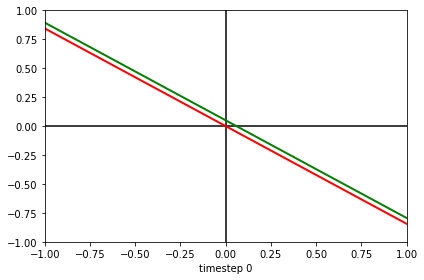

In [6]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.axvline(x = 0, ymin=-1, ymax=1, color ="black")
plt.axhline(y = 0, xmin=-1, xmax=1, color ="black")
    
    
x = np.linspace(-1,1,100)
y = [0]*x.shape[0]
y_epsilon = [0.05]*x.shape[0]

if side == 1:
    line_tail, = ax.plot(x, y_epsilon, 'g-', linewidth=2)
    line_eagle, = ax.plot(x, y, 'r-', linewidth=2)
else: 
    line_tail, = ax.plot(x, y, 'g-', linewidth=2)
    line_eagle, = ax.plot(x, y_epsilon, 'r-', linewidth=2)
    
sum_angle = 0
def update(h_delta):
    global sum_angle
    label = 'timestep {0}'.format(h_delta)
    print(label)
    
    sum_angle += count_angle(l, l_0, c, sum_angle, h_delta)
    print(sum_angle)
    
    if math.copysign(1, math.sin(sum_angle))*side > 0: 
        line_eagle.set_ydata(x*math.tan(sum_angle))
        line_tail.set_ydata(x*math.tan(sum_angle) + y_epsilon)
    else: 
        line_eagle.set_ydata(x*math.tan(sum_angle) + y_epsilon)
        line_tail.set_ydata(x*math.tan(sum_angle))

    ax.set_xlabel(label)
    return line_eagle, line_tail, ax
        
    
anim = FuncAnimation(fig, update, frames=range(h), interval=400)
anim.save('line.gif', dpi=150, writer='imagemagick')

In [ ]:
def get_coin_side(h, l, l_0, c, side):
    fi = c*math.sqrt(l_0*h)/(l-l_0)
    sin_fi = math.sin(fi)
    resutl = 0.5*(1 + math.copysign(1, sin_fi)*side)
    return int(resutl)

In [ ]:
result = get_coin_side(h, l, l_0, c, side)
result 